<a href="https://colab.research.google.com/github/jrangelg/Artificial-intelligence/blob/main/Sesi%C3%B3nIILilianaAhumada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
  <h1>Sesión 2</h1>
</center>

<center>
  <h2>Tipos de Muestreo
</h2>
</center>

# Clasificación de los métodos de muestreo

Los métodos de muestreo se dividen en dos grandes grupos:

1. **Muestreo probabilístico:**  
   Cada elemento de la población tiene una probabilidad conocida y diferente de cero de ser seleccionado.

2. **Muestreo no probabilístico:**  
   No todos los elementos tienen probabilidad conocida o igual de ser elegidos. La selección depende de factores como la accesibilidad, el juicio del investigador o la facilidad de contacto.


# TIPOS DE MUESTREO

🔷 **Muestreo No Probabilístico**
- Por cuotas
- Intencional o de conveniencia
- Bola de nieve
- Discrecional

🔶 **Muestreo Probabilístico**
- Aleatorio simple
- Aleatorio sistemático
- Aleatorio estratificado
- Aleatorio por conglomerados

#Muestreo por Cuotas

Es una <b style="color: #b35c00;">técnica de muestreo no probabilístico</b> en donde la muestra <span style="color: #b35c00;"><b>seleccionada tiene la misma proporción de individuos que toda la población</b></span> con respecto al fenómeno enfocado, las características o los rasgos conocidos.


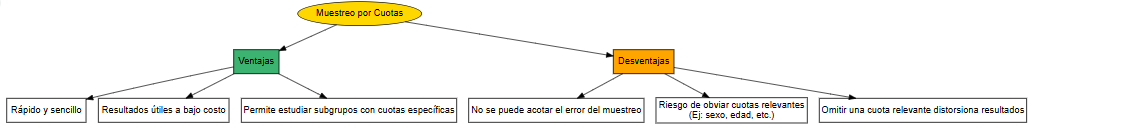

# Muestreo por conveniencia

**Es un método de muestreo no probabilístico** que consiste en **seleccionar una muestra de la población de manera conveniente para el investigador**.

Esta conveniencia se da ya que al investigador le resulta más sencillo examinar a individuos, objetos y elementos, por: **proximidad geográfica, por economía, por ser sus amigos, o simplemente porque están fácilmente disponibles.**


| **VENTAJAS**                                      | **DESVENTAJAS**                                         |
|---------------------------------------------------|---------------------------------------------------------|
| ✔️ Facilidad en la selección de la muestra         | ➤ La muestra no es representativa                       |
| ✔️ Método sencillo, económico y rápido             | ➤ No se puede inferir a la población                    |
| ✔️ Fuente de información exploratoria              | ➤ **Alto riesgo de sesgo sistemático** por la forma en que se selecciona la muestra |



#Bola de nieve

Es un método en el que <b style="color:#b35c00;">los individuos seleccionados</b> para ser estudiados <b style="color:#b35c00;">reclutan a nuevos participantes</b> entre sus conocidos, contactos, amigos, etc.

El nombre de "bola de nieve" hace referencia a que <span style="color:#cf5800;"><b>una bola de nieve al rodar se va haciendo más y más grande</b></span>; esta técnica permite que el tamaño de la muestra vaya creciendo a medida que los individuos seleccionados invitan a participar a sus conocidos.


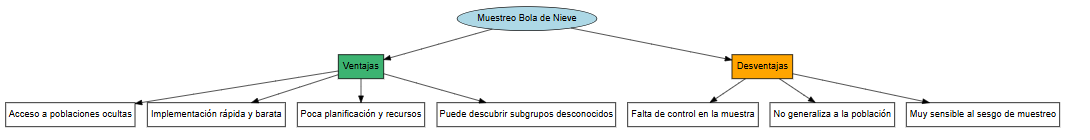

# Muestreo Intencional

Es un tipo de muestreo en el que el investigador selecciona una muestra <span style="color: #bfa000;"><b>basándose en su conocimiento sobre el tema, su juicio profesional, la experiencia de investigaciones o estudios pasados y el conocimiento que tiene sobre la población</b></span>.



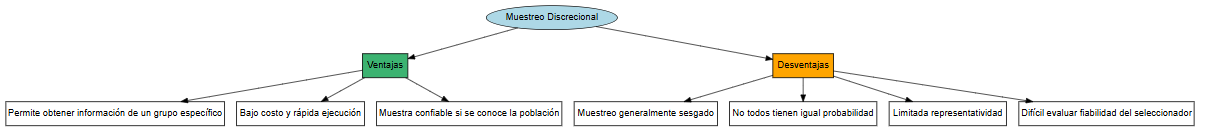

# simulacion de población

In [ ]:
import pandas as pd
import numpy as np
import random


np.random.seed(42)

poblacion = pd.DataFrame({
    "Nombre": ["Persona_" + str(i) for i in range(1, 251)],
    "Edad": np.random.randint(18, 70, 250),
    "Genero": np.random.choice(["F", "M"], 250),
    "Profesión": np.random.choice(["Docente", "Estudiante", "Comerciante", "Desempleado"], 250),
})

razas = ["Mestiza", "Indígena", "Afrodescendiente", "Blanca", "Otro"]
poblacion["Raza"] = np.random.choice(razas, 250, p=[0.6, 0.15, 0.15, 0.08, 0.02])


tipos_enfermedad = ["Ninguna", "Común", "Rara"]
poblacion["Enfermedad"] = np.random.choice(tipos_enfermedad, 250, p=[0.5, 0.4, 0.1])

# Añadimos número de hijos (basado en edad y aleatoriedad)
def hijos_por_edad(edad):
    if edad < 25:
        return np.random.choice([0, 1], p=[0.8, 0.2])
    elif edad < 35:
        return np.random.choice([0, 1, 2], p=[0.5, 0.3, 0.2])
    elif edad < 50:
        return np.random.choice([1, 2, 3, 4], p=[0.2, 0.4, 0.3, 0.1])
    else:
        return np.random.choice([2, 3, 4, 5], p=[0.1, 0.3, 0.4, 0.2])

poblacion["Num_Hijos"] = poblacion["Edad"].apply(hijos_por_edad)

# Mostramos los primeros registros
poblacion.head()


,Nombre,Edad,Genero,Profesión,Raza,Enfermedad,Num_Hijos
0,Persona_1,56,M,Estudiante,Indígena,Ninguna,5
1,Persona_2,69,M,Comerciante,Mestiza,Rara,3
2,Persona_3,46,M,Estudiante,Mestiza,Ninguna,3
3,Persona_4,32,F,Docente,Mestiza,Ninguna,0
4,Persona_5,60,F,Estudiante,Mestiza,Ninguna,5


In [ ]:
poblacion.tail()

In [ ]:
poblacion.describe()

,Edad,Num_Hijos
count,250.000000,250.000000
mean,43.556000,2.312000
std,15.307257,1.656997
min,18.000000,0.000000
25%,31.000000,1.000000
50%,44.000000,2.000000
75%,56.000000,4.000000
max,69.000000,5.000000


In [ ]:
poblacion['Enfermedad'].value_counts()

,count
Enfermedad,
Ninguna,113
Común,113
Rara,24


In [ ]:
poblacion['Genero'].value_counts()

,count
Genero,
M,134
F,116


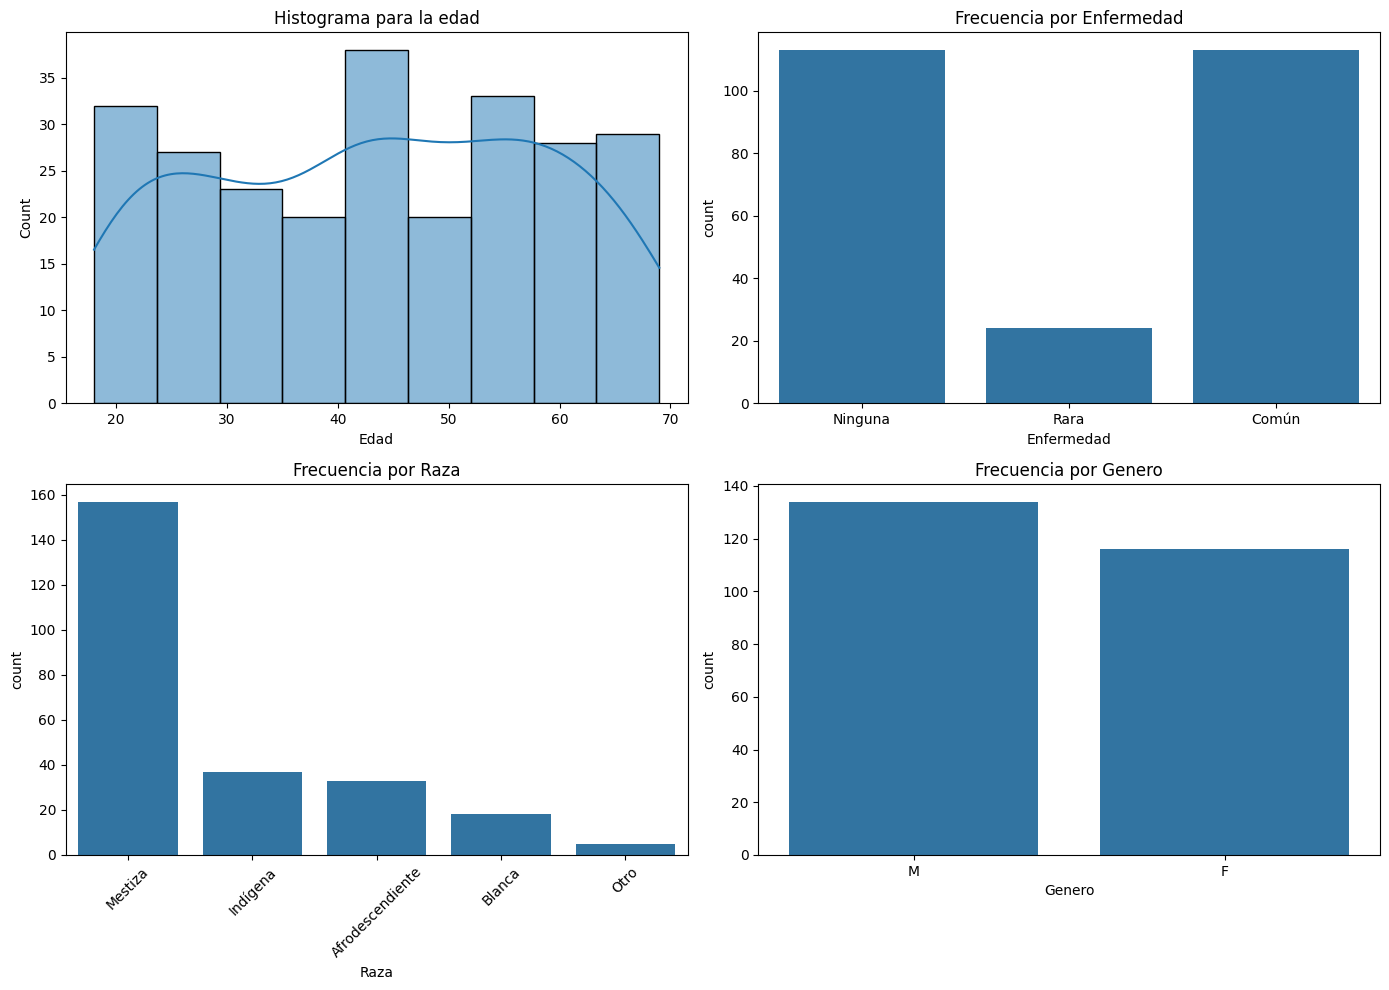

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

poblacion["Num_Hijos"] = poblacion["Edad"].apply(hijos_por_edad)

# Visualización de la distribución general
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(poblacion["Edad"], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Histograma para la edad")

sns.countplot(data=poblacion, x="Enfermedad", ax=axes[0, 1])
axes[0, 1].set_title("Frecuencia por Enfermedad")

sns.countplot(data=poblacion, x="Raza", order=razas, ax=axes[1, 0])
axes[1, 0].set_title("Frecuencia por Raza")
axes[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(data=poblacion, x="Genero", ax=axes[1, 1])
axes[1, 1].set_title("Frecuencia por Genero")

plt.tight_layout()
plt.show()



# Muestreo por conveniencia


**Percepciones sobre el acceso al sistema de salud en adultos mayores con enfermedades crónicas en contextos urbanos de bajos recursos**.

Contexto:

En entornos urbanos con alta heterogeneidad sociodemográfica, como barrios periféricos de grandes ciudades latinoamericanas, se observa una coexistencia de factores sociales, culturales y económicos que condicionan el acceso a los servicios de salud.

Existen reportes crecientes sobre brechas en el diagnóstico y tratamiento de enfermedades crónicas, especialmente entre personas con empleos informales, mujeres mayores o comunidades tradicionalmente excluidas como indígenas o afrodescendientes.

**Propósito del estudio**:

Comprender las barreras percibidas por los ciudadanos en el acceso a servicios de salud, con énfasis en aquellos que reportan enfermedades comunes o raras, explorando cómo influyen aspectos como la raza, el género, el número de hijos y la ocupación en dicha percepción.

**Justificación:** Uso de muestreo por conveniencia:

Dado que el objetivo es generar una comprensión exploratoria y cualitativa del fenómeno, el muestreo por conveniencia permite acceder rápidamente a los primeros participantes disponibles en centros comunitarios, espacios públicos o contactos previos, maximizando el uso eficiente del tiempo y los recursos en terreno.

Aunque este tipo de muestreo no garantiza representatividad, es útil para identificar patrones preliminares, construir categorías analíticas iniciales y definir futuras estrategias de muestreo teórico o intencional.

In [ ]:
condicion = (poblacion["Edad"] > 40) & (poblacion["Enfermedad"].isin(["Común", "Rara"]))
subgrupo_objetivo = poblacion[condicion]

muestra_conveniencia = subgrupo_objetivo.iloc[:17]
muestra_conveniencia


,Nombre,Edad,Genero,Profesión,Raza,Enfermedad,Num_Hijos
1,Persona_2,69,M,Comerciante,Mestiza,Rara,5
13,Persona_14,53,F,Estudiante,Otro,Común,4
14,Persona_15,57,F,Comerciante,Mestiza,Rara,4
15,Persona_16,41,M,Desempleado,Indígena,Común,1
19,Persona_20,41,F,Docente,Indígena,Rara,2
21,Persona_22,47,F,Desempleado,Afrodescendiente,Común,2
22,Persona_23,55,F,Desempleado,Afrodescendiente,Común,4
28,Persona_29,61,F,Desempleado,Mestiza,Rara,3
29,Persona_30,42,F,Desempleado,Mestiza,Común,1
31,Persona_32,44,M,Comerciante,Afrodescendiente,Común,1


/tmp/ipython-input-12-2191431298.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=muestra_conveniencia, x="Profesión", palette="muted")


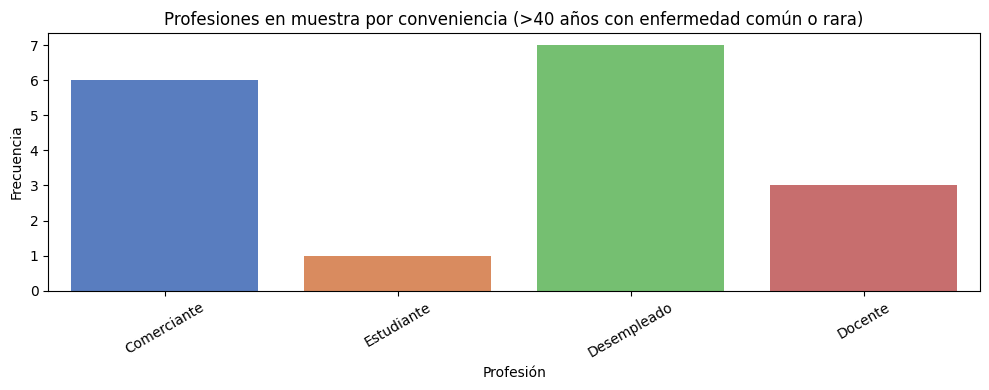

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=muestra_conveniencia, x="Profesión", palette="muted")
plt.title("Profesiones en muestra por conveniencia (>40 años con enfermedad común o rara)")
plt.xlabel("Profesión")
plt.ylabel("Frecuencia")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


**Título del estudio:**

Preservación de lenguas ancestrales entre mujeres indígenas y afrodescendientes adultas en contextos urbanos

***Propósito del estudio:***

Explorar el rol de las mujeres adultas pertenecientes a comunidades étnicas (indígenas o afrodescendientes) en la transmisión y preservación de lenguas ancestrales en zonas urbanas, considerando sus experiencias personales, barreras culturales, y prácticas familiares o comunitarias.

Justificación del muestreo intencional:

En este caso, la población objetivo representa una minoría cultural y lingüística. El estudio se enfoca en mujeres mayores que pertenezcan a comunidades indígenas o afrodescendientes, ya que suelen desempeñar un papel clave en la transmisión intergeneracional de las lenguas y tradiciones.

In [ ]:
condicion_lenguas = (
    (poblacion["Genero"] == "F") &
    (poblacion["Edad"] > 18) &
    (poblacion["Raza"].isin(["Indígena", "Afrodescendiente"]))
)

muestra_intencional_lenguas = poblacion[condicion_lenguas]
muestra_intencional_lenguas


,Nombre,Edad,Genero,Profesión,Raza,Enfermedad,Num_Hijos
17,Persona_18,39,F,Docente,Indígena,Rara,4
19,Persona_20,41,F,Docente,Indígena,Rara,2
21,Persona_22,47,F,Desempleado,Afrodescendiente,Común,2
22,Persona_23,55,F,Desempleado,Afrodescendiente,Común,4
26,Persona_27,29,F,Estudiante,Afrodescendiente,Común,2
32,Persona_33,59,F,Comerciante,Afrodescendiente,Común,3
51,Persona_52,67,F,Docente,Indígena,Común,3
66,Persona_67,67,F,Desempleado,Indígena,Común,5
92,Persona_93,64,F,Docente,Indígena,Común,3
105,Persona_106,41,F,Estudiante,Afrodescendiente,Ninguna,1


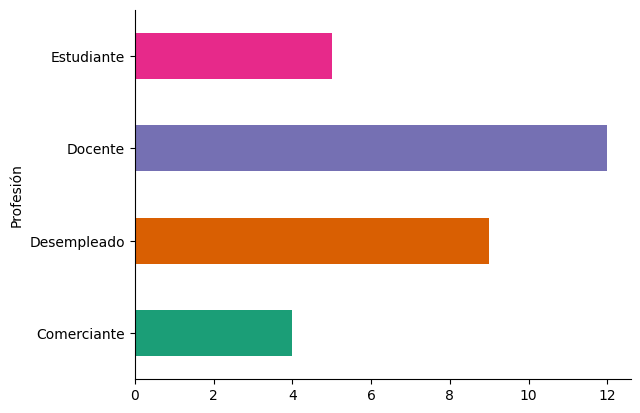

In [ ]:
# @title Profesión

from matplotlib import pyplot as plt
import seaborn as sns
muestra_intencional_lenguas.groupby('Profesión').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/tmp/ipython-input-14-1105456475.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=muestra_intencional_lenguas, x="Raza", palette="Accent")


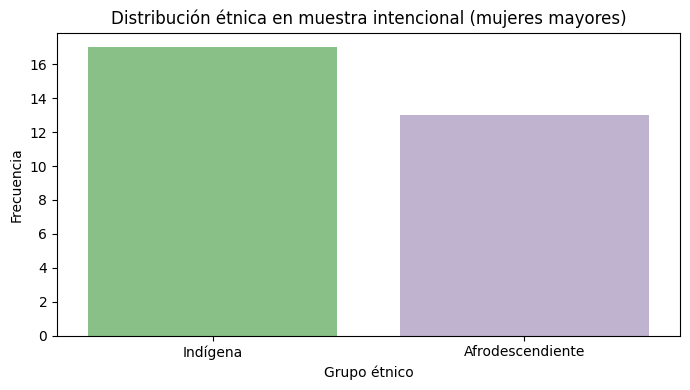

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=muestra_intencional_lenguas, x="Raza", palette="Accent")
plt.title("Distribución étnica en muestra intencional (mujeres mayores)")
plt.xlabel("Grupo étnico")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

**Título del estudio:**

Difusión del conocimiento técnico en redes informales de mujeres ingenieras con enfermedades crónicas en el sector educativo

***Propósito del estudio:***

Explorar cómo circula el conocimiento técnico entre mujeres dedicadas a la enseñanza de ingeniería en contextos adversos, como vivir con una enfermedad crónica. El estudio busca mapear redes de apoyo profesional, mentoría y colaboración entre mujeres docentes de ingeniería que enfrentan barreras personales o estructurales.

El estudio busca mapear las conexiones sociales que facilitan la transferencia de conocimientos técnicos.



In [ ]:
import networkx as nx

# Usamos los nombres como nodos
nombres = poblacion["Nombre"].tolist()

G = nx.Graph()
for nombre in nombres:
    conocidos = random.sample(nombres, k=random.randint(2, 3))
    for otro in conocidos:
        if nombre != otro:
            G.add_edge(nombre, otro)

def muestreo_bola_de_nieve_nombre(nodo_inicial, pasos=2):
    visitados = set([nodo_inicial])
    frontera = [nodo_inicial]
    for _ in range(pasos):
        nuevos = []
        for nodo in frontera:
            vecinos = list(G.neighbors(nodo))
            nuevos += [v for v in vecinos if v not in visitados]
        frontera = nuevos
        visitados.update(frontera)
    return poblacion[poblacion["Nombre"].isin(visitados)]


semilla = poblacion[
    (poblacion["Genero"] == "F") &
    (poblacion["Profesión"] == "Docente") &
    (poblacion["Enfermedad"].isin(["Común", "Rara"]))
].iloc[0]["Nombre"]

muestra_bola = muestreo_bola_de_nieve_nombre(semilla, pasos=2)
muestra_bola



,Nombre,Edad,Genero,Profesión,Raza,Enfermedad,Num_Hijos
2,Persona_3,46,M,Estudiante,Mestiza,Ninguna,1
7,Persona_8,56,F,Estudiante,Mestiza,Ninguna,3
8,Persona_9,36,F,Docente,Blanca,Común,1
31,Persona_32,44,M,Comerciante,Afrodescendiente,Común,1
43,Persona_44,24,M,Docente,Mestiza,Común,0
45,Persona_46,26,F,Comerciante,Mestiza,Común,2
46,Persona_47,56,F,Comerciante,Mestiza,Ninguna,4
66,Persona_67,67,F,Desempleado,Indígena,Común,5
75,Persona_76,43,M,Desempleado,Blanca,Común,2
80,Persona_81,31,F,Docente,Mestiza,Común,0


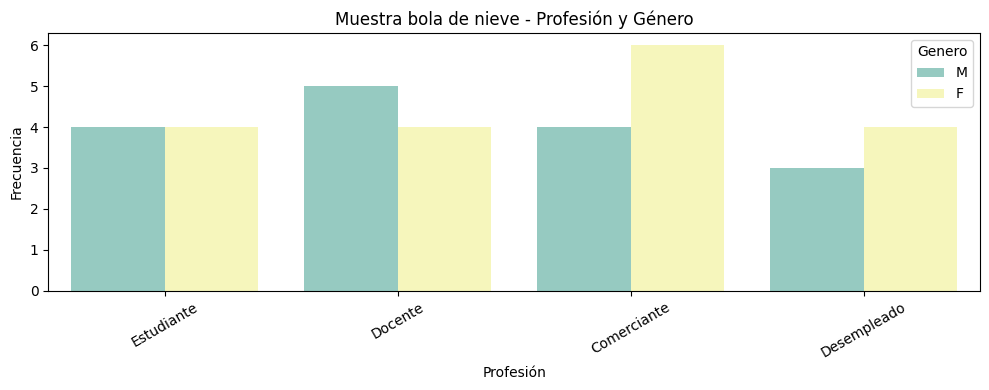

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=muestra_bola, x="Profesión", hue="Genero", palette="Set3")
plt.title("Muestra bola de nieve - Profesión y Género")
plt.xlabel("Profesión")
plt.ylabel("Frecuencia")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


##Solución

In [ ]:
muestra_filtrada = muestra_bola[
    (muestra_bola["Genero"] == "F") &
    (muestra_bola["Profesión"] == "Docente") &
    (muestra_bola["Enfermedad"].isin(["Común", "Rara"]))
]
muestra_filtrada

,Nombre,Edad,Genero,Profesión,Raza,Enfermedad,Num_Hijos
8,Persona_9,36,F,Docente,Blanca,Común,1
80,Persona_81,31,F,Docente,Mestiza,Común,0
227,Persona_228,66,F,Docente,Indígena,Común,4


**Título del estudio:**

Percepciones sobre riesgo climático en función del entorno socioeconómico: un análisis desde ocupaciones y género en zonas urbanas

***Propósito del estudio:***

Explorar cómo distintas poblaciones urbanas perciben el impacto del cambio climático —como el aumento de temperatura, deslizamientos o inundaciones— en su calidad de vida. El objetivo es garantizar representación de voces diferenciadas por género y tipo de ocupación, sin necesidad de un marco probabilístico.



In [ ]:

cuota_f = poblacion[poblacion["Genero"] == "F"].groupby("Profesión").apply(lambda x: x.sample(1, random_state=1)).reset_index(drop=True)
cuota_m = poblacion[poblacion["Genero"] == "M"].groupby("Profesión").apply(lambda x: x.sample(1, random_state=1)).reset_index(drop=True)


muestra_cuotas = pd.concat([cuota_f, cuota_m])
muestra_cuotas


/tmp/ipython-input-22-3977778499.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cuota_f = poblacion[poblacion["Genero"] == "F"].groupby("Profesión").apply(lambda x: x.sample(1, random_state=1)).reset_index(drop=True)
/tmp/ipython-input-22-3977778499.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cuota_m = poblacion[poblacion["Genero"] == "M"].groupby("Profesión").apply(lambda x: x.sample(1, random

,Nombre,Edad,Genero,Profesión,Raza,Enfermedad,Num_Hijos
0,Persona_65,34,F,Comerciante,Blanca,Común,0
1,Persona_215,58,F,Desempleado,Mestiza,Común,4
2,Persona_132,54,F,Docente,Afrodescendiente,Ninguna,3
3,Persona_183,45,F,Estudiante,Mestiza,Ninguna,3
0,Persona_225,54,M,Comerciante,Mestiza,Común,3
1,Persona_102,18,M,Desempleado,Afrodescendiente,Común,0
2,Persona_38,68,M,Docente,Indígena,Rara,3
3,Persona_114,25,M,Estudiante,Mestiza,Común,1


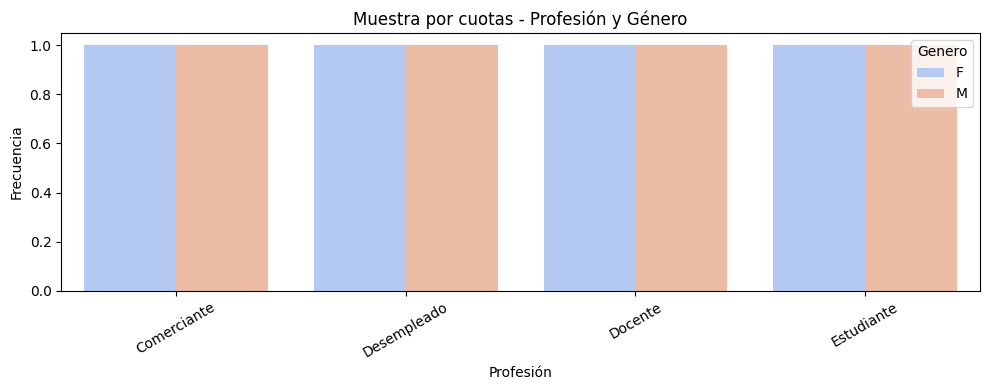

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=muestra_cuotas, x="Profesión", hue="Genero", palette="coolwarm")
plt.title("Muestra por cuotas - Profesión y Género")
plt.xlabel("Profesión")
plt.ylabel("Frecuencia")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


# **Muestreo probabilístico:**  **Estudios cuantitativos**
   Cada elemento de la población tiene una probabilidad conocida y diferente de cero de ser seleccionado.

    Diseños de muestreo: Entorno R   (Universo Finita)
    - MAS: Muestreo Aleatorio Simple
    - Estratificado
    - Conglomerados

    Inferencia: Representación, Aleatorización, Cantidad adecuada de elementos, Generalizacion para el universo de estudio



#  Características Fundamentales del Muestreo Probabilístico

El **muestreo probabilístico** se basa en mecanismos aleatorios de selección, lo que permite garantizar **inferencia estadística válida** y el control formal del error muestral.

# **Terminos fundamentales**
---

##  Soporte del Muestreo (Conjunto de Muestras Posibles)

En términos formales, el **soporte de muestreo** ($\mathcal{Q}$) es el **conjunto de todas las muestras posibles** que pueden extraerse de la población bajo el diseño muestral definido.

- **Definición:**  
  Sea $U = \{1,2,...,N\}$ la población.  
  El soporte de muestreo es $\mathcal{Q} = \{s \subset U: |s| = n\}$ en el caso de muestreo aleatorio simple sin reemplazo.

- **Propiedad clave:**  
  A cada muestra $s \in \mathcal{S}$ se le asocia una **probabilidad de selección** $P(s)$, determinada por el diseño.

- **Diferencia con marco muestral:**  
  El **marco** es el listado de unidades; el **soporte** es el conjunto de muestras posibles y sus probabilidades.

---

## 🎲 Probabilidad de Inclusión

- **Probabilidad de inclusión de la unidad $i$:**
  $$
  \pi_i = P(i \in s) = \sum_{s \ni i} P(s)
  $$

- **Probabilidad conjunta de inclusión ($i$, $j$):**
  $$
  \pi_{ij} = P(i \in s \text{ y } j \in s) = \sum_{s \ni i,\, s \ni j} P(s)
  $$

Estas probabilidades son la base para definir estimadores insesgados y sus varianzas.

---

##  Tamaño de Muestra

El **tamaño de muestra** ($n$) influye directamente en la precisión de los estimadores y depende de:

- El parámetro de interés (media, total, proporción, etc.)
- La variabilidad de la población ($S^2$)
- El nivel de confianza ($Z$)
- El margen de error ($d - ɛ$)
- El diseño muestral (efecto de diseño o "design effect" en diseños complejos)
---

##  Estimadores Probabilísticos Destacables

En muestreo probabilístico, los **estimadores insesgados** más robustos son:

- ### **1. Horvitz-Thompson (HT)**
  General para cualquier diseño, usa probabilidades de inclusión:
  $$
  \hat{Y}_{HT} = \sum_{i \in s} \frac{y_i}{\pi_i}
  $$
  - $\hat{Y}_{HT}$: estimador del total poblacional
  - $y_i$: valor de la variable en la unidad $i$
  - $\pi_i$: probabilidad de inclusión de $i$

- ### **2. Hansen-Hurwitz (HH)**
  Para muestreo con reemplazo, usando probabilidades de selección:
  $$
  \hat{Y}_{HH} = \frac{1}{n} \sum_{i=1}^n \frac{y_i}{p_i}
  $$
  - $p_i$: probabilidad de seleccionar la unidad $i$ en una extracción

- ### **3. Estimador de Razón**
  Para estimar totales usando variables auxiliares ($x$):
  $$
  \hat{Y}_{R} = \frac{\bar{y}}{\bar{x}} X
  $$
  - $X$: total conocido de la variable auxiliar en la población

- ### **4. Estimador de Regresión**
  Ajusta usando regresión lineal entre $y$ y $x$:
  $$
  \hat{Y}_{reg} = N \left( \bar{y} + b (\bar{X} - \bar{x}) \right)
  $$
  - $b$: estimador de la pendiente de la regresión
  - $\bar{X}$: media poblacional de $x$

---

## 📊 Error Muestral y Precisión

El **error estándar** de los estimadores puede ser calculado con fórmulas exactas en función del diseño, por ejemplo:

- **Varianza del estimador HT:**
  $$
  \mathrm{Var}(\hat{Y}_{HT}) = \sum_{i \in U} \sum_{j \in U} \left( \frac{\pi_{ij} - \pi_i \pi_j}{\pi_{ij}} \frac{y_i}{\pi_i} \frac{y_j}{\pi_j} \right)
  $$

- **Intervalos de confianza**:
  $$
  \hat{\theta} \pm Z \cdot SE(\hat{\theta})
  $$

---



In [ ]:
install.packages("janitor")
library(readr)
library(janitor)

ruta<-"/content/sample_data/colon.csv"

df<-read_csv2(ruta )|>clean_names()

head(df)

In [ ]:
dim(df)

In [ ]:
tail(df)

In [ ]:
colSums(is.na(df))

In [ ]:
summary(df)

In [ ]:
df<-na.omit(df)

In [ ]:
dim(df)

In [ ]:
sum(duplicated(df))

Muestreo Aleatorio Simple sin Reemplazo (MAS)
El Muestreo Aleatorio Simple sin Reemplazo (MAS) es una de las técnicas de muestreo probabilístico más utilizadas. Consiste en seleccionar una muestra de tamaño n de una población de tamaño N, de tal manera que todas las muestras posibles tienen la misma probabilidad de ser seleccionadas.

Características principales:
Cada individuo tiene la misma probabilidad de ser seleccionado.

Una vez seleccionado un individuo, no puede volver a ser seleccionado (sin reemplazo).

Es el diseño más simple y suele ser la base para comparar otras técnicas de muestreo.

Ventajas:
Fácil de entender y aplicar.

Resultados fácilmente extrapolables a la población bajo supuestos de homogeneidad.

Limitaciones:
Requiere un listado completo de la población.

No es eficiente si la población es muy grande o está dispersa.